In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.models import resnet34


# Part A)

In [ ]:
# Step 1: Loading the pre-trained model and modifying the fully connected layer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet34(weights='DEFAULT').to(device)

for param in model.parameters():
    param.requires_grad = False

# Change the fully connected layer to fit the two-class problem
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 43.4MB/s]


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
classes = [0, 1]
filtered_trainset = torch.utils.data.Subset(trainset,[i for i in range(len(trainset)) if trainset.targets[i] in classes])
trainloader = torch.utils.data.DataLoader(filtered_trainset, batch_size=4, shuffle=True, num_workers=2)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
filtered_testset = torch.utils.data.Subset(testset,[i for i in range(len(testset)) if testset.targets[i] in classes])
testloader = torch.utils.data.DataLoader(filtered_testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('airplane', 'automobile')


100%|██████████| 170498071/170498071 [00:02<00:00, 71197771.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


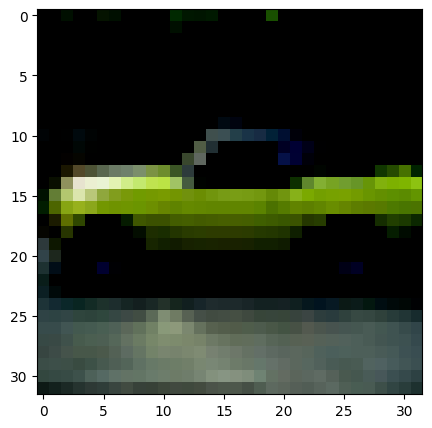

In [ ]:
sample , lable = next(iter(trainloader))
fig ,axe = plt.subplots(ncols=1,nrows=1,figsize=(10,5))
axe.imshow(sample[0].numpy().transpose(1, 2, 0))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = model.to(device)
# Train the model
n_epochs = 10
train_loss_values = []
train_accuracy_values = []

for epoch in range(n_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss_values.append(running_loss / len(trainloader))
    train_accuracy_values.append(100 * correct / total)
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}, Accuracy: {100 * correct / total}%')


Epoch 1, Loss: 0.5730284278638661, Accuracy: 72.36%
Epoch 2, Loss: 0.536990623229742, Accuracy: 75.62%
Epoch 3, Loss: 0.536474353030324, Accuracy: 75.61%
Epoch 4, Loss: 0.534537530592084, Accuracy: 76.19%
Epoch 5, Loss: 0.5377218899011612, Accuracy: 75.44%
Epoch 6, Loss: 0.5371765887513756, Accuracy: 75.47%
Epoch 7, Loss: 0.5530432123605162, Accuracy: 74.58%
Epoch 8, Loss: 0.5416078778214752, Accuracy: 75.5%
Epoch 9, Loss: 0.5478367677375674, Accuracy: 75.26%
Epoch 10, Loss: 0.5365378458485007, Accuracy: 75.35%


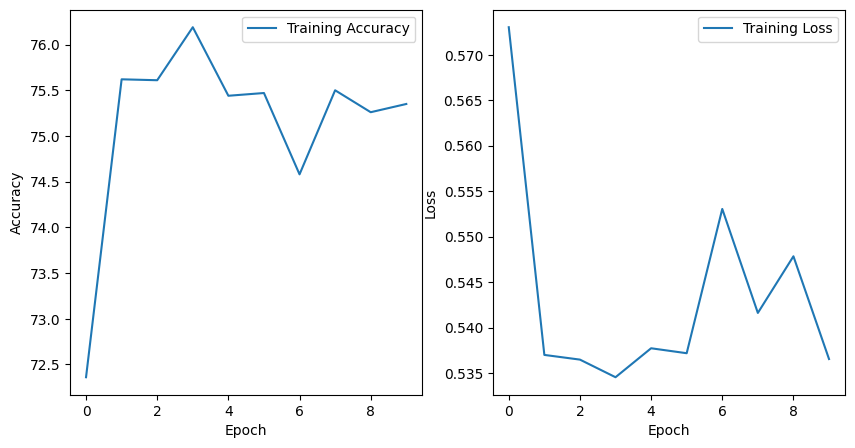

In [ ]:
# Plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images: {100 * correct / total}%')


Accuracy of the network on the train images: 75.4%


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total}%')


Accuracy of the network on the test images: 73.9%


# part B)

The triple loss function aims to ensure that the distance between an anchor data point and a positive data point (which should have the same class or label as the anchor) in an embedding space is minimized, while the distance between the anchor and a negative data point (which should have a different class or label from the anchor) is maximized.

In essence, the triple loss function encourages the model to map similar data points close to each other in the embedding space while pushing dissimilar data points apart. This helps the model to learn discriminative representations and is often used in Siamese networks or triplet networks.

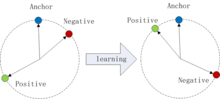

The loss function can be described by means of the Euclidean distance function
$$
\mathcal{L}(A, P, N)=\max \left(\|\mathrm{f}(A)-\mathrm{f}(P)\|_2-\|\mathrm{f}(A)-\mathrm{f}(N)\|_2+\alpha, 0\right)
$$
where $A$ is an anchor input, $P$ is a positive input of the same class as $A, N$ is a negative input of a different class from $A, \alpha$ is a margin between positive and negative pairs, and $\mathrm{f}$ is an embedding.

This can then be used in a cost function, that is the sum of all losses, which can then be used for minimization of the posed optimization problem
$$
\mathcal{J}=\sum_{i=1}^M \mathcal{L}\left(A^{(i)}, P^{(i)}, N^{(i)}\right)
$$

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import numpy as np

class Triplet_Dataset(Dataset):
    def __init__(self, root_dir, train, transform=None, classes=[0,1]):
        self.root_dir = root_dir
        self.transform = transform

        trainset = CIFAR10(
            root=self.root_dir,
            train=train,
            download=True,
            transform=transform)

        self.filtered_trainset = torch.utils.data.Subset(trainset,[i for i in range(len(trainset)) if trainset.targets[i] in classes])
        self.class0_trainset = torch.utils.data.Subset(trainset,[i for i in range(len(trainset)) if trainset.targets[i] == 0])
        self.class1_trainset = torch.utils.data.Subset(trainset,[i for i in range(len(trainset)) if trainset.targets[i] == 1])
        self.trainset = trainset
        self.n0 = 0
        self.n1 = 0
    def __getitem__(self, index):
        anchor, anchor_label = self.filtered_trainset[index]


        if anchor_label==0:
          pos_data,_ = self.class0_trainset[np.random.randint(low=self.n0,high=len(self.class0_trainset))]
          neg_data,_ = self.class1_trainset[np.random.randint(low=self.n1,high=len(self.class1_trainset))]
        else:
          pos_data,_ = self.class1_trainset[np.random.randint(low=self.n1,high=len(self.class1_trainset))]
          neg_data,_ = self.class0_trainset[np.random.randint(low=self.n0,high=len(self.class0_trainset))]


        return anchor, pos_data, neg_data, anchor_label

    def __len__(self):
        return len(self.filtered_trainset)
    def reset(self):
        self.n0 = 0
        self.n1 = 0


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

triplet_trainset = Triplet_Dataset(root_dir='./data',train=True,transform=transform)
triplet_testset = Triplet_Dataset(root_dir='./data',train=False,transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def plot_triplet( anchor, positive, negative, anchor_label):
  fig ,axes = plt.subplots(ncols=3,nrows=1,figsize=(20,8))
  axes[0].imshow(anchor.numpy().transpose(1, 2, 0))
  axes[0].axis("off")
  axes[0].set_title(anchor_label)
  axes[1].imshow(positive.numpy().transpose(1, 2, 0))
  axes[1].axis("off")
  axes[1].set_title('pos')
  axes[2].imshow(negative.numpy().transpose(1, 2, 0))
  axes[2].axis("off")
  axes[2].set_title('neg')

In [ ]:
batch_size = 64
triplet_trainloader = DataLoader(triplet_trainset, batch_size=batch_size, shuffle=True)
triplet_testloader = DataLoader(triplet_testset, batch_size=batch_size, shuffle=False)

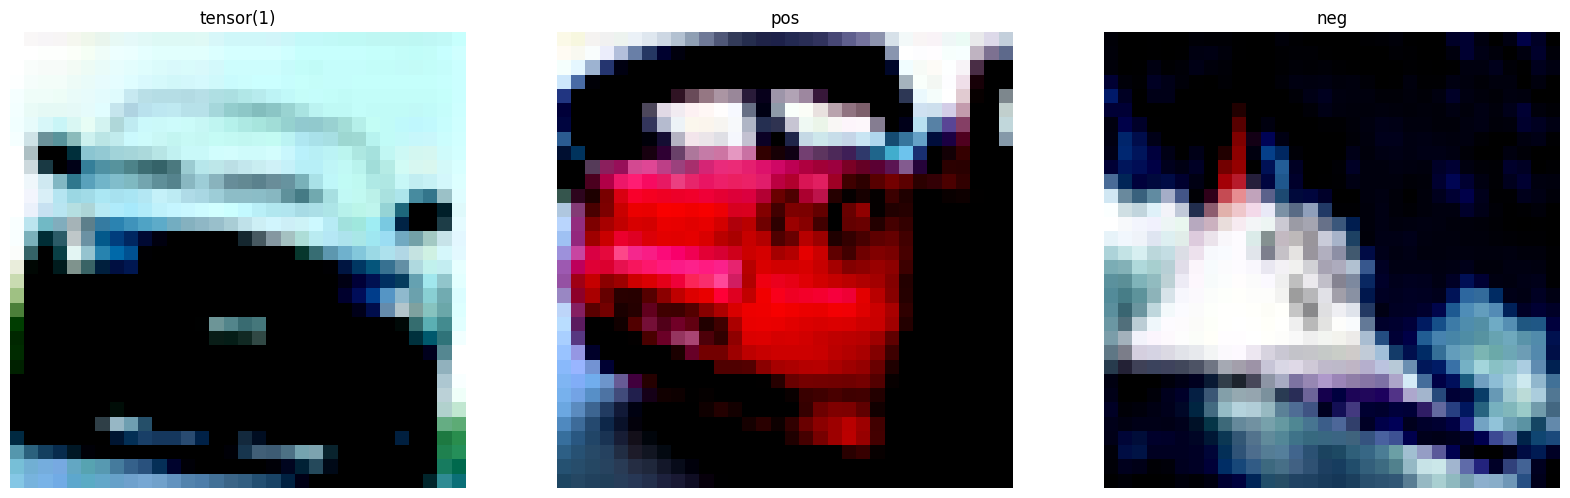

In [ ]:
anchor, positive, negative, anchor_label = next(iter(triplet_trainloader))
plot_triplet(anchor[0], positive[0], negative[0], anchor_label[0])

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self,model):
        super(FeatureExtractor, self).__init__()
        model.fc = nn.Identity()
        self.model = model

    def forward(self, x):
        return self.model(x)

feature_extractor = FeatureExtractor(resnet34(weights='DEFAULT')).to(device=device)

In [ ]:
print(feature_extractor)

FeatureExtractor(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [ ]:
triplet_loss = nn.TripletMarginLoss()
optimizer = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)

In [ ]:
train_triple_losses = []
num_epochs = 15

for epoch in range(num_epochs):
    feature_extractor.train()
    running_loss = 0.0
    for anchor, positive, negative, _ in triplet_trainloader:
        optimizer.zero_grad()
        anchor_embedding = feature_extractor(anchor.to(device))
        pos_embedding = feature_extractor(positive.to(device))
        neg_embedding = feature_extractor(negative.to(device))

        loss = triplet_loss(anchor_embedding,pos_embedding,neg_embedding)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss/len(triplet_trainloader)

    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')
    train_triple_losses.append(epoch_loss)

Epoch 1, Loss: 0.6806465612285456
Epoch 2, Loss: 0.33696715514750997
Epoch 3, Loss: 0.5017374552264335
Epoch 4, Loss: 0.330104545233356
Epoch 5, Loss: 0.23563943732126502
Epoch 6, Loss: 0.17483256232871372
Epoch 7, Loss: 0.15338381785590938
Epoch 8, Loss: 0.11184432399073604
Epoch 9, Loss: 0.19016282106186175
Epoch 10, Loss: 0.09591947626441148
Epoch 11, Loss: 0.0776744335415257
Epoch 12, Loss: 0.08700546770576079
Epoch 13, Loss: 0.0789789981594321
Epoch 14, Loss: 0.08856329981498658
Epoch 15, Loss: 0.04856584047910514


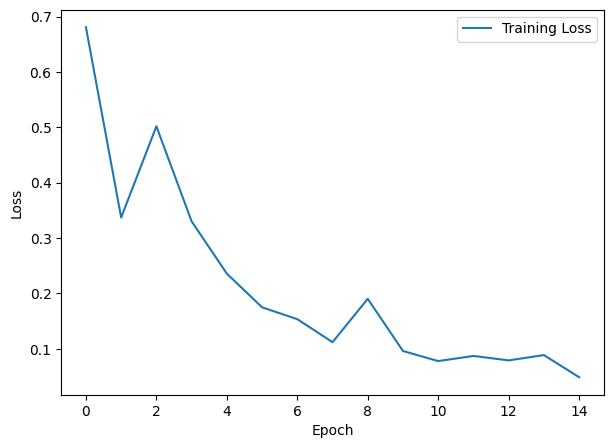

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(train_triple_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
class Model(nn.Module):
  def __init__(self,per_model):
    super(Model, self).__init__()
    for param in per_model.model.parameters():
      param.requires_grad = False
    num_features = 512
    per_model.model.fc = nn.Linear(num_features, 2)
    self.model = per_model.model
  def forward(self, x):
    x = self.model(x)
    return x

In [ ]:
model = Model(feature_extractor).to(device)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"The layer '{name}' is not frozen.")

The layer 'model.fc.weight' is not frozen.
The layer 'model.fc.bias' is not frozen.


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = model.to(device)
# Train the model
n_epochs = 10
train_loss_values = []
train_accuracy_values = []

for epoch in range(n_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss_values.append(running_loss / len(trainloader))
    train_accuracy_values.append(100 * correct / total)
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}, Accuracy: {100 * correct / total}%')


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
train_loss_values = []
train_accuracy_values = []
num_epochs = 15

for epoch in range(n_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss_values.append(running_loss / len(trainloader))
    train_accuracy_values.append(100 * correct / total)
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}, Accuracy: {100 * correct / total}%')

Epoch 1, Loss: 0.33685136251971126, Accuracy: 87.9%
Epoch 2, Loss: 0.2940655323248357, Accuracy: 89.67%
Epoch 3, Loss: 0.2705812761103734, Accuracy: 90.15%
Epoch 4, Loss: 0.2539912422377616, Accuracy: 91.02%
Epoch 5, Loss: 0.2616641090122983, Accuracy: 90.16%
Epoch 6, Loss: 0.275469028962031, Accuracy: 89.87%
Epoch 7, Loss: 0.273348044347018, Accuracy: 89.87%
Epoch 8, Loss: 0.2605735697148833, Accuracy: 90.33%
Epoch 9, Loss: 0.24874407020895742, Accuracy: 90.49%
Epoch 10, Loss: 0.26260489551764915, Accuracy: 90.44%


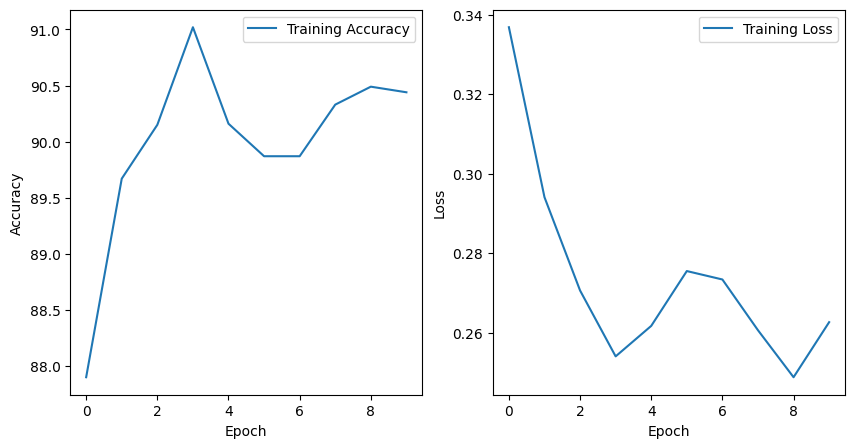

In [ ]:
# Plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images: {100 * correct / total}%')


Accuracy of the network on the train images: 83.74%


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images: {100 * correct / total}%')


Accuracy of the network on the train images: 80.4%


printed out label that says is on terain images is wrong

the result above is on test images


## part C)

In [ ]:
class Model(nn.Module):
  def __init__(self,model):
    super(Model, self).__init__()
    self.feature_extractor = model
    self.feature_extractor.fc = nn.Identity()
    num_features = 512
    self.fc = nn.Linear(num_features, 2)
  def forward(self, x):
    features = self.feature_extractor(x)
    label = self.fc(features)
    return features, label

In [ ]:
model = Model(resnet34(weights='DEFAULT')).to(device=device)

In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
triplet_loss = nn.TripletMarginLoss()
train_fe_loss = []
train_ce_loss = []
train_loss_values = []
train_accuracy_values = []
num_epochs = 7

for epoch in range(num_epochs):
    running_loss = 0.0
    ce_loss = 0.0
    fe_loss = 0.0
    correct = 0
    total = 0
    for anchor, positive, negative, labels in triplet_trainloader:

        optimizer.zero_grad()
        anchor_embedding ,outputs = model(anchor.to(device))
        pos_embedding,_ = model(positive.to(device))
        neg_embedding,_ = model(negative.to(device))
        labels = labels.to(device)
        loss_tri = triplet_loss(anchor_embedding,pos_embedding,neg_embedding)
        loss_ce = criterion(outputs, labels)



        loss = loss_tri + loss_ce
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ce_loss += loss_ce.item()
        fe_loss += loss_tri.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_fe_loss.append(fe_loss / len(trainloader))
    train_ce_loss.append(ce_loss / len(trainloader))
    train_loss_values.append(running_loss / len(trainloader))
    train_accuracy_values.append(100 * correct / total)
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}, Accuracy: {100 * correct / total}%')

Epoch 1, Loss: 0.05707499648332596, Accuracy: 90.0%
Epoch 2, Loss: 0.026928947888314726, Accuracy: 94.69%
Epoch 3, Loss: 0.018663327452540398, Accuracy: 96.33%
Epoch 4, Loss: 0.019688220823183656, Accuracy: 95.52%
Epoch 5, Loss: 0.019558706288039684, Accuracy: 95.61%
Epoch 6, Loss: 0.009529511540010572, Accuracy: 97.84%
Epoch 7, Loss: 0.005865637078508735, Accuracy: 98.65%


Text(0.5, 0, 'Epoch')

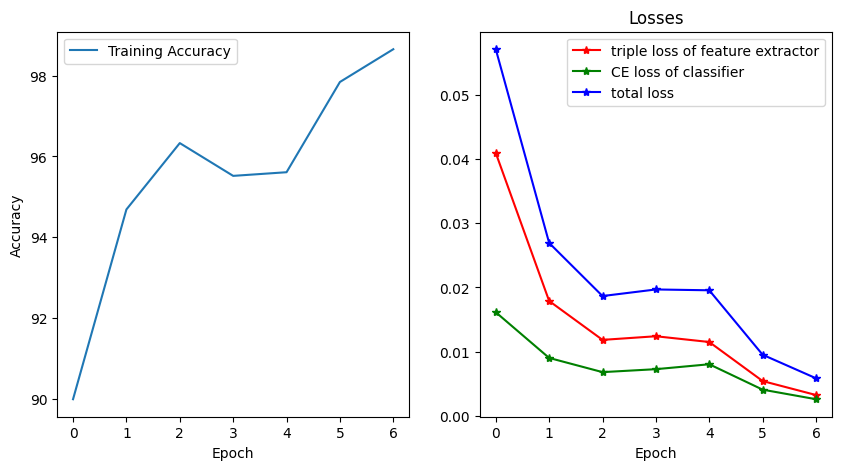

In [ ]:
# Plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_fe_loss, marker='*',c='r')
plt.plot(train_ce_loss, marker='*',c='g')
plt.plot(train_loss_values, marker='*',c='b')


plt.legend(['triple loss of feature extractor','CE loss of classifier','total loss'])

plt.title('Losses')
plt.xlabel('Epoch')


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        _,outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images: {100 * correct / total}%')


Accuracy of the network on the train images: 98.48%


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        _,outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total}%')


Accuracy of the network on the test images: 96.2%


In [ ]:
torch.save(model.state_dict(), 'end_to_end_trainedModel.pth')